<a href="https://colab.research.google.com/github/TonyNguyen001/BaiTapAI/blob/main/Nh%E1%BA%ADn_d%E1%BA%A1ng_11_t%E1%BB%9D_ti%E1%BB%81n_VN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/11_loai_tien/train',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/11_loai_tien/test',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 220 images belonging to 11 classes.
Found 110 images belonging to 11 classes.


In [4]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [6]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [8]:
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(training_data,
                  steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=100,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/100
7/7 [==============================] - 123s 18s/step - loss: 4.5402 - accuracy: 0.1091 - val_loss: 2.3678 - val_accuracy: 0.1182
Epoch 2/100
7/7 [==============================] - 46s 7s/step - loss: 2.2672 - accuracy: 0.1273 - val_loss: 2.1142 - val_accuracy: 0.2091
Epoch 3/100
7/7 [==============================] - 46s 7s/step - loss: 1.9825 - accuracy: 0.2545 - val_loss: 1.7684 - val_accuracy: 0.3000
Epoch 4/100
7/7 [==============================] - 45s 7s/step - loss: 1.5578 - accuracy: 0.4636 - val_loss: 1.1076 - val_accuracy: 0.7000
Epoch 5/100
7/7 [==============================] - 45s 7s/step - loss: 1.0267 - accuracy: 0.6955 - val_loss: 0.8779 - val_accuracy: 0.7364
Epoch 6/100
7/7 [==============================] - 45s 7s/step - loss: 0.6431 - accuracy: 0.8045 - val_loss: 0.5258 - val_accuracy: 0.8636
Epoch 7/100
7/7 [==============================] - 45s 7s/step - loss: 0.4274 - accuracy: 0.8727 - val_loss: 0.4103 - val_accuracy: 0.8818
Epoch 8/100
7/7 [========

Sai số kiểm tra là:  0.10851393640041351
Độ chính xác kiểm tra là:  0.9818181991577148


<function matplotlib.pyplot.show>

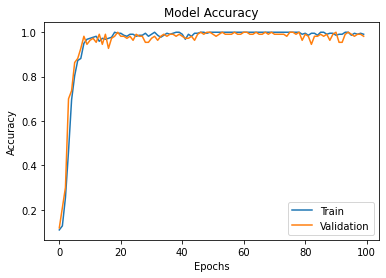

In [10]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [11]:
model.save('model_11_To_Tien_VN.h5')
model=load_model('model_11_To_Tien_VN.h5')

1000


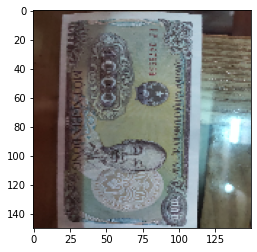

In [17]:
img=load_img("/content/drive/MyDrive/11_loai_tien/single_prediction/1000.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='2000'
if round(result[0][5])==1:
  prediction='20000'
if round(result[0][6])==1:
  prediction='200000'
if round(result[0][7])==1:
  prediction='500'
if round(result[0][8])==1:
  prediction='5000'
if round(result[0][9])==1:
  prediction='50000'
if round(result[0][10])==1:
  prediction='500000'
print(prediction)

2000


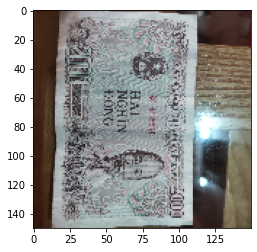

In [18]:
img=load_img("/content/drive/MyDrive/11_loai_tien/single_prediction/2000.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='2000'
if round(result[0][5])==1:
  prediction='20000'
if round(result[0][6])==1:
  prediction='200000'
if round(result[0][7])==1:
  prediction='500'
if round(result[0][8])==1:
  prediction='5000'
if round(result[0][9])==1:
  prediction='50000'
if round(result[0][10])==1:
  prediction='500000'
print(prediction)

5000


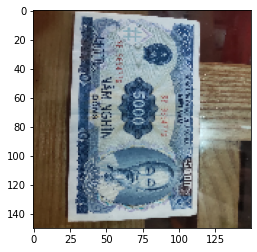

In [19]:
img=load_img("/content/drive/MyDrive/11_loai_tien/single_prediction/5000.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='2000'
if round(result[0][5])==1:
  prediction='20000'
if round(result[0][6])==1:
  prediction='200000'
if round(result[0][7])==1:
  prediction='500'
if round(result[0][8])==1:
  prediction='5000'
if round(result[0][9])==1:
  prediction='50000'
if round(result[0][10])==1:
  prediction='500000'
print(prediction)

500000


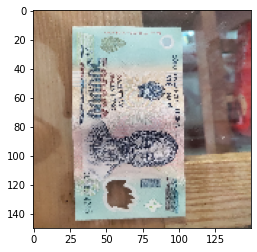

In [20]:
img=load_img("/content/drive/MyDrive/11_loai_tien/single_prediction/500000.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='2000'
if round(result[0][5])==1:
  prediction='20000'
if round(result[0][6])==1:
  prediction='200000'
if round(result[0][7])==1:
  prediction='500'
if round(result[0][8])==1:
  prediction='5000'
if round(result[0][9])==1:
  prediction='50000'
if round(result[0][10])==1:
  prediction='500000'
print(prediction)